# Edge detection
In clesperanto, multiple filters for edge-detection are implemented.

See also
* [Wikipedia](https://en.wikipedia.org/wiki/Edge_detection)

In [1]:
import pyclesperanto as cle
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

cle.select_device()

(OpenCL) NVIDIA GeForce RTX 4090 (OpenCL 3.0 CUDA)
	Vendor:                      NVIDIA Corporation
	Driver Version:              535.216.01
	Device Type:                 GPU
	Compute Units:               128
	Global Memory Size:          24217 MB
	Maximum Object Size:         6054 MB
	Max Clock Frequency:         2625 MHz
	Image Support:               Yes

array([[ 40.,  32.,  24., ..., 216., 200., 200.],
       [ 56.,  40.,  24., ..., 232., 216., 216.],
       [ 64.,  48.,  24., ..., 240., 232., 232.],
       ...,
       [ 72.,  80.,  80., ...,  48.,  48.,  48.],
       [ 80.,  80.,  80., ...,  48.,  48.,  48.],
       [ 96.,  88.,  80., ...,  48.,  48.,  48.]], dtype=float32, mtype=buffer)
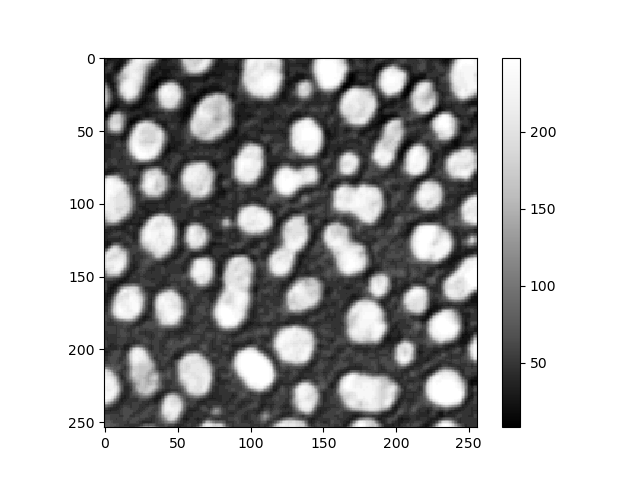
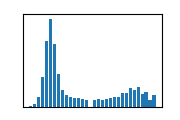

In [2]:
blobs = cle.asarray(imread('https://samples.fiji.sc/blobs.png').squeeze().astype(np.float32))
blobs

## Sobel operator
[see also](https://en.wikipedia.org/wiki/Sobel_operator)

array([[ 68.818596,  86.162636,  40.792156, ..., 132.42355 ,  90.50967 ,
         64.      ],
       [104.307236, 132.42355 ,  60.92618 , ..., 124.45079 , 132.42355 ,
        128.      ],
       [ 67.88225 , 120.266365,  57.68882 , ...,  68.818596,  68.818596,
         64.      ],
       ...,
       [ 60.92618 ,  46.647614,  32.      , ...,   0.      ,   0.      ,
          0.      ],
       [ 80.      ,  40.792156,  11.313708, ...,   0.      ,   0.      ,
          0.      ],
       [ 60.92618 ,  57.68882 ,  25.298222, ...,   0.      ,   0.      ,
          0.      ]], dtype=float32, mtype=buffer)
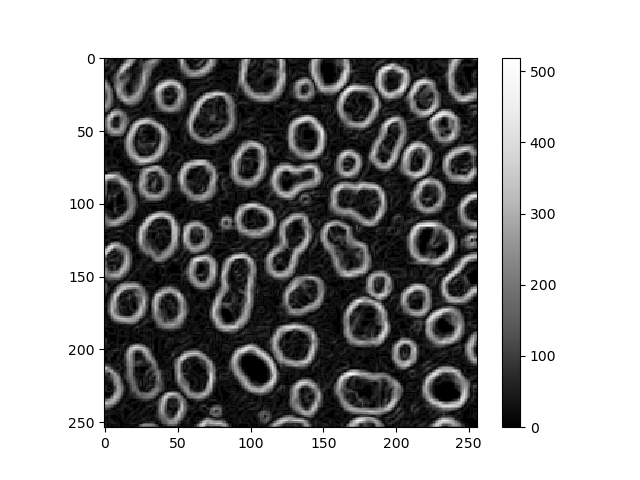
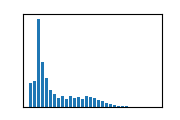

In [3]:
blobs_sobel = cle.sobel(blobs)
blobs_sobel

## Laplace operator
[see also](https://en.wikipedia.org/wiki/Discrete_Laplace_operator)

array([[-16., -24., -32., ..., -40., -96., -48.],
       [ 64.,   8., -56., ...,  40., -40.,   0.],
       [128.,  64., -88., ...,  40.,  16.,  48.],
       ...,
       [-16.,  40.,  24., ...,   0.,   0.,   0.],
       [-24., -16.,  -8., ...,   0.,   0.,   0.],
       [ 64.,  24., -16., ...,   0.,   0.,   0.]], dtype=float32, mtype=buffer)
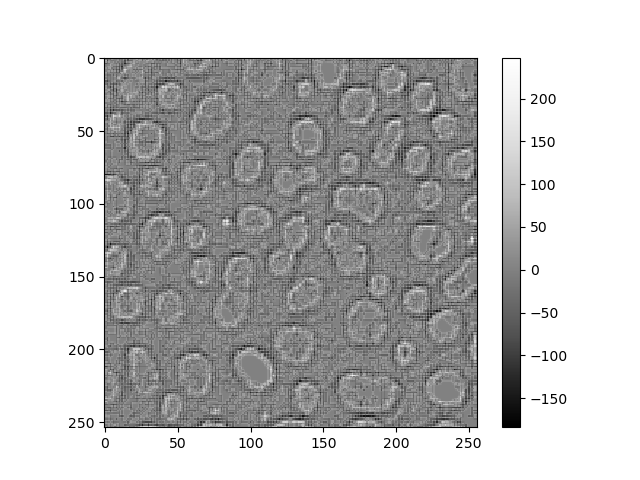
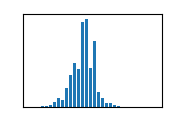

In [6]:
blobs_laplace = cle.laplace(blobs)
blobs_laplace

## Laplacian of Gaussian
[Also kown as the Mexican hat filter](https://en.wikipedia.org/wiki/Ricker_wavelet)

array([[ 7.5574722e+00, -4.4327126e+00, -8.4331646e+00, ...,
        -1.2825256e+01, -1.8233643e+01, -2.8584320e+01],
       [ 1.3092461e+01,  1.7703438e+00, -2.1148834e+00, ...,
        -1.3137817e-01, -3.0071716e+00, -1.0908295e+01],
       [ 9.6622581e+00,  1.4873314e+00, -1.0298843e+00, ...,
         3.1014862e+00,  9.9249268e-01, -5.4479065e+00],
       ...,
       [ 7.8439331e-01,  2.0144577e+00,  3.0336304e+00, ...,
        -2.0529556e-01, -3.6827087e-01, -3.6431885e-01],
       [ 4.8791733e+00,  3.3652649e+00,  3.4452591e+00, ...,
        -8.0348969e-02, -1.7396545e-01, -2.1364594e-01],
       [ 1.7403801e+01,  1.1412994e+01,  8.4632034e+00, ...,
        -2.3174286e-02, -6.7871094e-02, -1.0802460e-01]], dtype=float32, mtype=buffer)
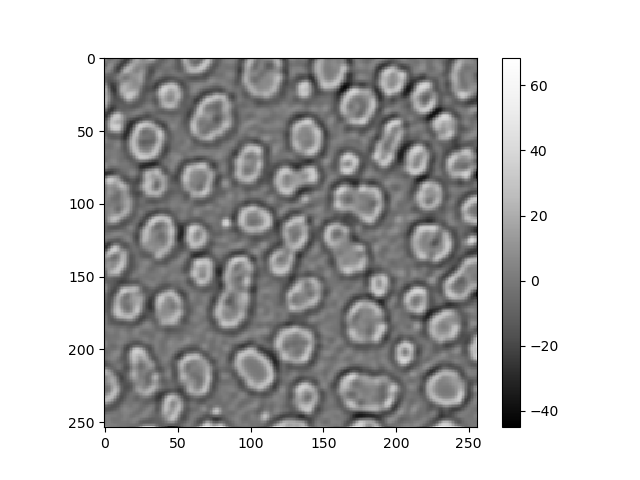
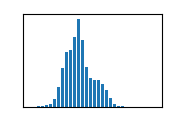

In [10]:
blobs_laplacian_of_gaussian = cle.laplace(cle.gaussian_blur(blobs, sigma_x=2, sigma_y=2))
blobs_laplacian_of_gaussian

array([[ 0.7280655 , -2.071373  , -2.746029  , ..., -2.3329468 ,
        -3.2956085 , -8.296265  ],
       [ 1.801384  , -0.44898224, -0.79792786, ...,  1.9602203 ,
         1.2943726 , -3.1303406 ],
       [ 1.3617897 , -0.51296234, -0.8673744 , ...,  2.079544  ,
         1.4770355 , -2.5575562 ],
       ...,
       [ 2.9276962 ,  0.15541077,  0.13283539, ..., -1.0572968 ,
        -0.7716179 , -1.2406998 ],
       [ 3.7949905 ,  0.58216095,  0.51379395, ..., -1.1535339 ,
        -0.86094284, -1.5314331 ],
       [10.268105  ,  6.2820816 ,  5.6942444 , ..., -0.45281982,
        -0.521328  , -1.5948486 ]], dtype=float32, mtype=buffer)
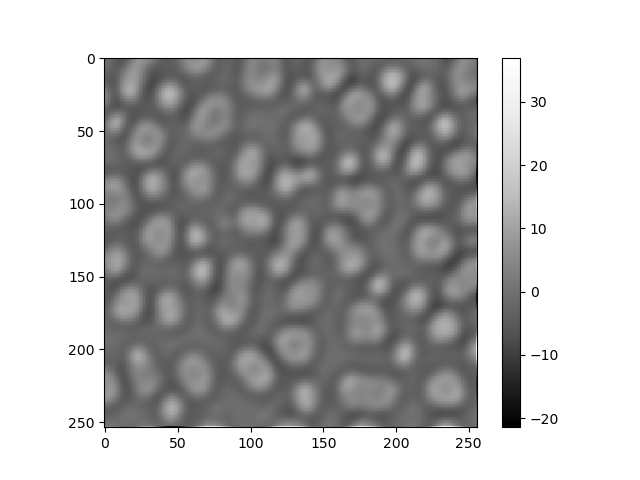
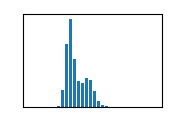

In [11]:
blobs_laplacian_of_gaussian = cle.laplace(cle.gaussian_blur(blobs, sigma_x=5, sigma_y=5))
blobs_laplacian_of_gaussian

## Local Variance filter

array([[1.4995264e+02, 1.4052811e+02, 1.2398720e+02, ..., 3.0728378e+02,
        3.1707547e+02, 3.0995038e+02],
       [1.5246167e+02, 1.4342191e+02, 1.2909294e+02, ..., 2.7080984e+02,
        2.8300565e+02, 2.8180801e+02],
       [1.5338847e+02, 1.4492549e+02, 1.3323695e+02, ..., 2.3150333e+02,
        2.4431136e+02, 2.4681181e+02],
       ...,
       [1.7072493e+02, 1.6290898e+02, 1.5444627e+02, ..., 9.5031538e+00,
        7.5798035e+00, 8.4628153e+00],
       [1.6226216e+02, 1.5775098e+02, 1.5362436e+02, ..., 5.8138142e+00,
        3.0161736e+00, 3.4882977e+00],
       [1.5486584e+02, 1.5207706e+02, 1.5135135e+02, ..., 3.4882882e+00,
        1.4551915e-11, 1.4551915e-11]], dtype=float32, mtype=buffer)
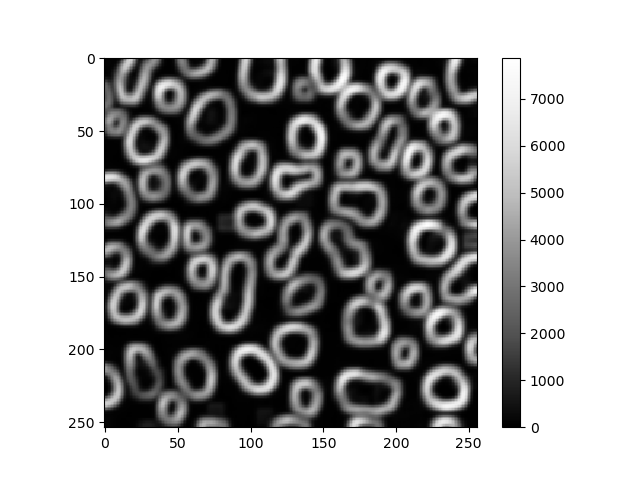
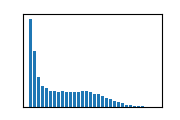

In [12]:
blobs_edges = cle.variance_filter(blobs, radius_x=5, radius_y=5)
blobs_edges

# Local standard deviation
... is just the square root of the local variance

array([[1.22455149e+01, 1.18544550e+01, 1.11349535e+01, ...,
        1.75295124e+01, 1.78066139e+01, 1.76054077e+01],
       [1.23475370e+01, 1.19758892e+01, 1.13619070e+01, ...,
        1.64563007e+01, 1.68227711e+01, 1.67871380e+01],
       [1.23850098e+01, 1.20385008e+01, 1.15428314e+01, ...,
        1.52152328e+01, 1.56304617e+01, 1.57102451e+01],
       ...,
       [1.30661745e+01, 1.27635794e+01, 1.24276409e+01, ...,
        3.08271861e+00, 2.75314426e+00, 2.90909195e+00],
       [1.27382174e+01, 1.25598955e+01, 1.23945303e+01, ...,
        2.41118526e+00, 1.73671341e+00, 1.86769855e+00],
       [1.24445114e+01, 1.23319530e+01, 1.23024940e+01, ...,
        1.86769593e+00, 3.81469727e-06, 3.81469727e-06]], dtype=float32, mtype=buffer)
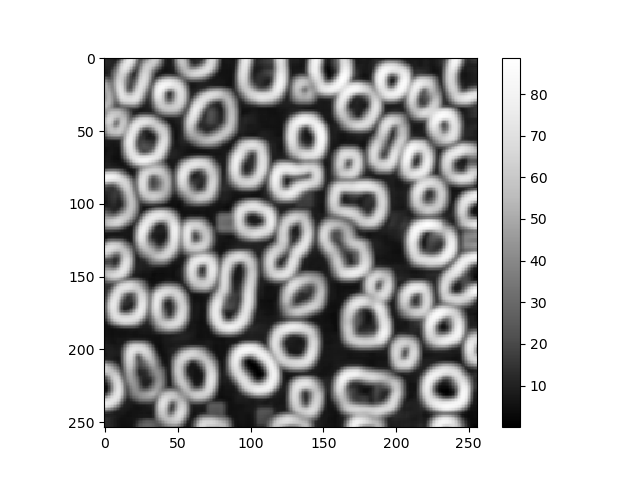
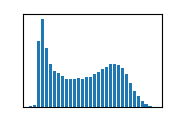

In [13]:
blobs_edges = cle.standard_deviation(blobs, radius_x=5, radius_y=5)
blobs_edges

## Edge detection is not edge enhancement
Intuitively, one could apply an edge detection filter to enhance edges in images showing edges. Let's try with an image showing membranes. It's a 3D image btw.

array([[[ 62,  90, 110, ...,  64,  63,  63],
        [ 66,  88, 115, ...,  72,  57,  63],
        [ 60,  80, 120, ...,  49,  55,  46],
        ...,
        [ 84,  82,  61, ...,  39,  57,  75],
        [ 84,  89,  68, ...,  52,  51,  56],
        [ 67,  91,  67, ...,  50,  50,  74]],

       [[ 70,  83, 106, ...,  73,  67,  65],
        [ 57,  97, 112, ...,  74,  77,  62],
        [ 55,  86, 114, ...,  47,  56,  64],
        ...,
        [110,  80,  63, ...,  50,  47,  59],
        [ 98,  76,  65, ...,  44,  57,  67],
        [ 88,  77,  54, ...,  45,  55,  75]],

       [[ 70,  84, 109, ...,  55,  63,  70],
        [ 60,  59, 116, ...,  89,  60,  63],
        [ 55,  84, 103, ...,  64,  55,  59],
        ...,
        [ 88,  61,  56, ...,  38,  42,  61],
        [ 93,  82,  45, ...,  40,  42,  53],
        [ 86,  82,  55, ...,  40,  52,  58]],

       ...,

       [[ 28,  36,  28, ...,  66,  58,  58],
        [ 32,  39,  38, ...,  81,  65,  58],
        [ 30,  34,  35, ...,  81,  70,  79],
        ...,
        [ 53,  50,  62, ...,  43,  55,  65],
        [ 53,  69,  65, ...,  49,  55,  57],
        [ 58,  69,  72, ...,  44,  68,  45]],

       [[ 34,  47,  36, ...,  68,  63,  53],
        [ 37,  46,  35, ...,  88,  78,  55],
        [ 33,  42,  47, ...,  85,  66,  78],
        ...,
        [ 56,  56,  58, ...,  61,  69,  68],
        [ 56,  58,  59, ...,  49,  49,  56],
        [ 56,  74,  70, ...,  47,  56,  63]],

       [[ 35,  36,  33, ...,  63,  75,  48],
        [ 38,  42,  39, ...,  81,  66,  56],
        [ 40,  41,  41, ...,  90,  70,  70],
        ...,
        [ 45,  60,  59, ...,  70,  59,  86],
        [ 51,  69,  59, ...,  53,  65,  56],
        [ 65,  61,  67, ...,  57,  54,  60]]], dtype=uint8, mtype=buffer)
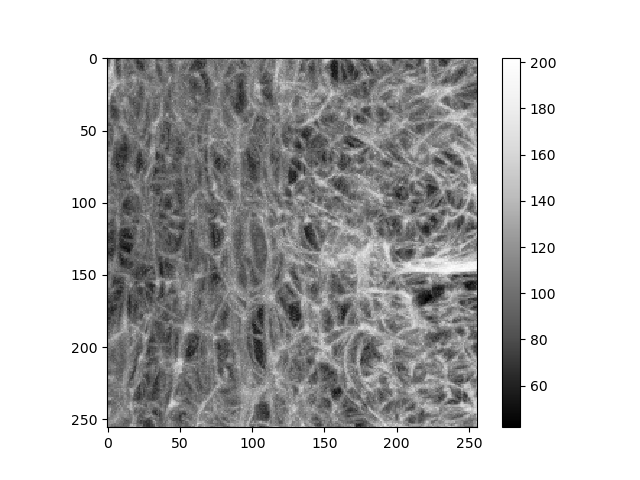
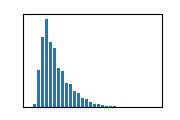

In [14]:
image = cle.asarray(imread("https://github.com/clEsperanto/clesperanto_example_data/raw/main/EM_C_6_c0.tif"))
image

array([[36, 39, 25, ..., 63, 35, 30],
       [28, 35, 34, ..., 65, 49, 35],
       [33, 30, 33, ..., 74, 60, 41],
       ...,
       [82, 91, 94, ..., 27, 34, 30],
       [80, 92, 83, ..., 28, 28, 23],
       [85, 73, 52, ..., 33, 31, 26]], dtype=uint8, mtype=buffer)
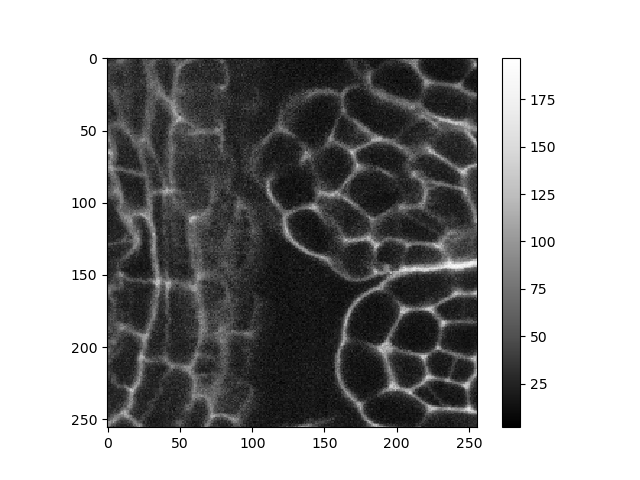
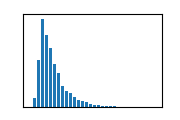

In [15]:
image[60]

array([[ 94.212524,  46.90416 ,  70.79548 , ..., 745.9082  , 554.22015 ,
        159.40828 ],
       [ 81.87796 ,  75.75619 ,  35.665108, ..., 449.33173 , 555.7913  ,
        314.24036 ],
       [115.186806,  69.70653 ,  92.49324 , ..., 116.73474 , 551.6883  ,
        445.5592  ],
       ...,
       [388.5769  , 222.91478 , 455.52936 , ...,  98.95454 , 100.53358 ,
         77.32399 ],
       [190.93454 , 359.8041  , 715.31464 , ...,  89.01124 ,  95.13674 ,
         72.965744],
       [402.52203 , 578.80133 , 624.2083  , ...,  51.48786 ,  85.2467  ,
         61.25357 ]], dtype=float32, mtype=buffer)
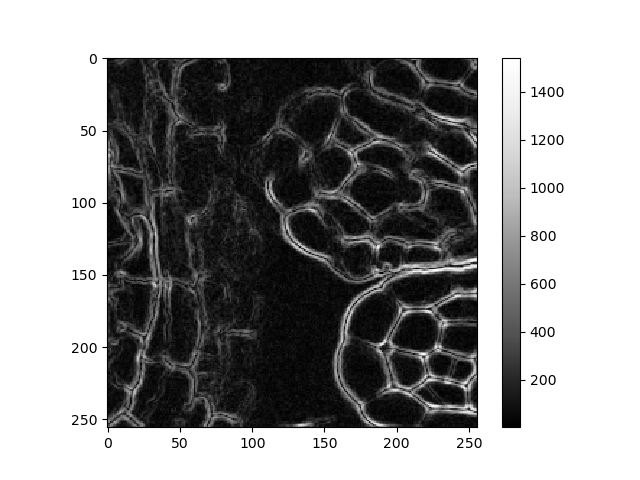
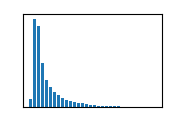

In [16]:
image_sobel = cle.sobel(image)
image_sobel[60]

When looking very carefully, you may observe that the edges are a bit thicker in the second image. The edge detection filter detects two edges, the increasing signal side of the membrane and the decreasing signal on the opposite side. Let's zoom:

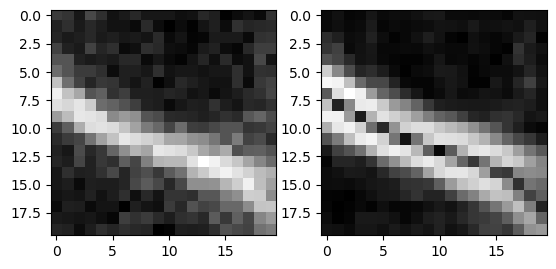

In [17]:
fig, axs = plt.subplots(1, 2)
cle.imshow(                image[60, 125:145, 135:155], plot=axs[0])
cle.imshow(cle.pull(image_sobel)[60, 125:145, 135:155], plot=axs[1])

## Enhancing edges
Thus, to enhance edges in a membrane image, other filters are more useful. Enhancement may for example mean making membranes thicker and potentially closing gaps.

## Local standard deviation

array([[ 7.281108 ,  8.134167 ,  9.307523 , ..., 22.200241 , 22.482313 ,
        22.947588 ],
       [ 7.527383 ,  8.277992 ,  9.340383 , ..., 22.438158 , 22.56258  ,
        22.862804 ],
       [ 7.616369 ,  8.2730255,  9.217964 , ..., 22.246216 , 22.198227 ,
        22.322107 ],
       ...,
       [21.216759 , 21.85667  , 22.474333 , ...,  5.8944025,  6.0558376,
         6.11078  ],
       [20.416151 , 21.406435 , 22.281712 , ...,  4.995865 ,  5.0696273,
         5.019058 ],
       [19.928537 , 21.225594 , 22.266607 , ...,  4.8122764,  4.898234 ,
         4.8279524]], dtype=float32, mtype=buffer)
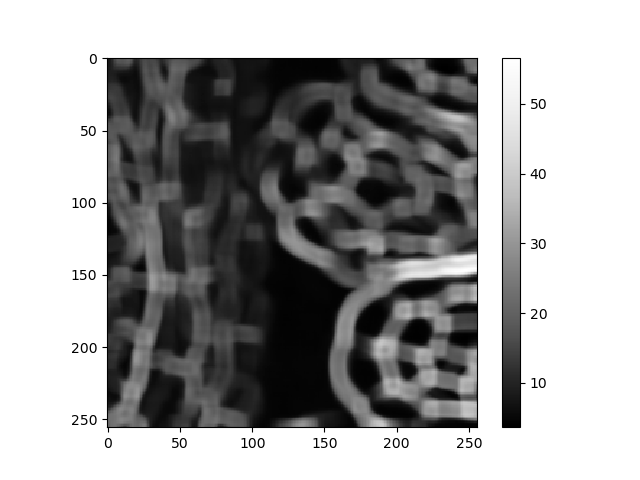
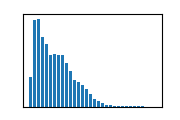

In [18]:
image_std = cle.standard_deviation(image, radius_x=5, radius_y=5, radius_z=5)
image_std[60]

## Local maximum

array([[ 51,  53,  61, ..., 108, 112, 108],
       [ 53,  57,  61, ..., 112, 112, 116],
       [ 57,  59,  70, ..., 116, 116, 116],
       ...,
       [124, 124, 124, ...,  44,  44,  44],
       [119, 119, 124, ...,  44,  44,  44],
       [119, 119, 119, ...,  44,  44,  44]], dtype=uint8, mtype=buffer)
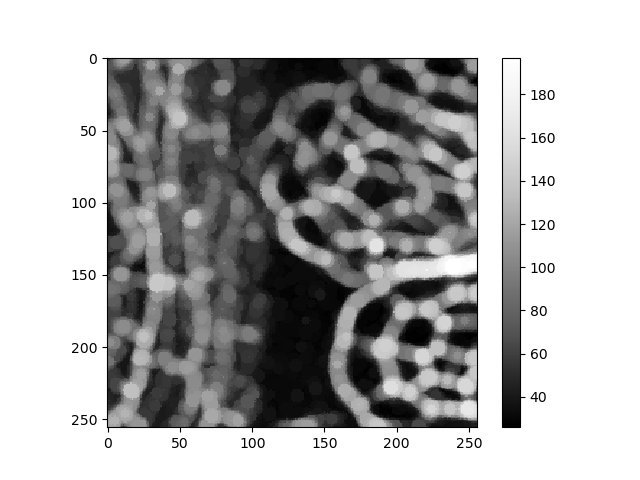
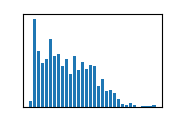

In [23]:
image_max = cle.maximum_filter(image, radius_x=5, radius_y=5, radius_z=5, connectivity="sphere")
image_max[60]